In [3]:
#Import libraries
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import os
import PIL
import pathlib

In [4]:
#Creating Path

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_dir = tensorflow.keras.utils.get_file('flower_photos',origin=dataset_url, untar = True)

data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [8]:
#count and retrieve all Images

image_count = len(list(data_dir.glob("*/*.jpg")))

In [28]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/15761264350_4caaf080f6_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5570018782_c56bee942f.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/13979889721_42a59ca9fa_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg')]

In [12]:
#Display count of Roses

len(list(data_dir.glob("roses/*.jpg")))


641

In [13]:
image_count_roses = len(list(data_dir.glob("roses/*.jpg")))
print(image_count_roses)

641


In [16]:
#copy all paths or names of roses
rose = list(data_dir.glob("roses/*.jpg"))

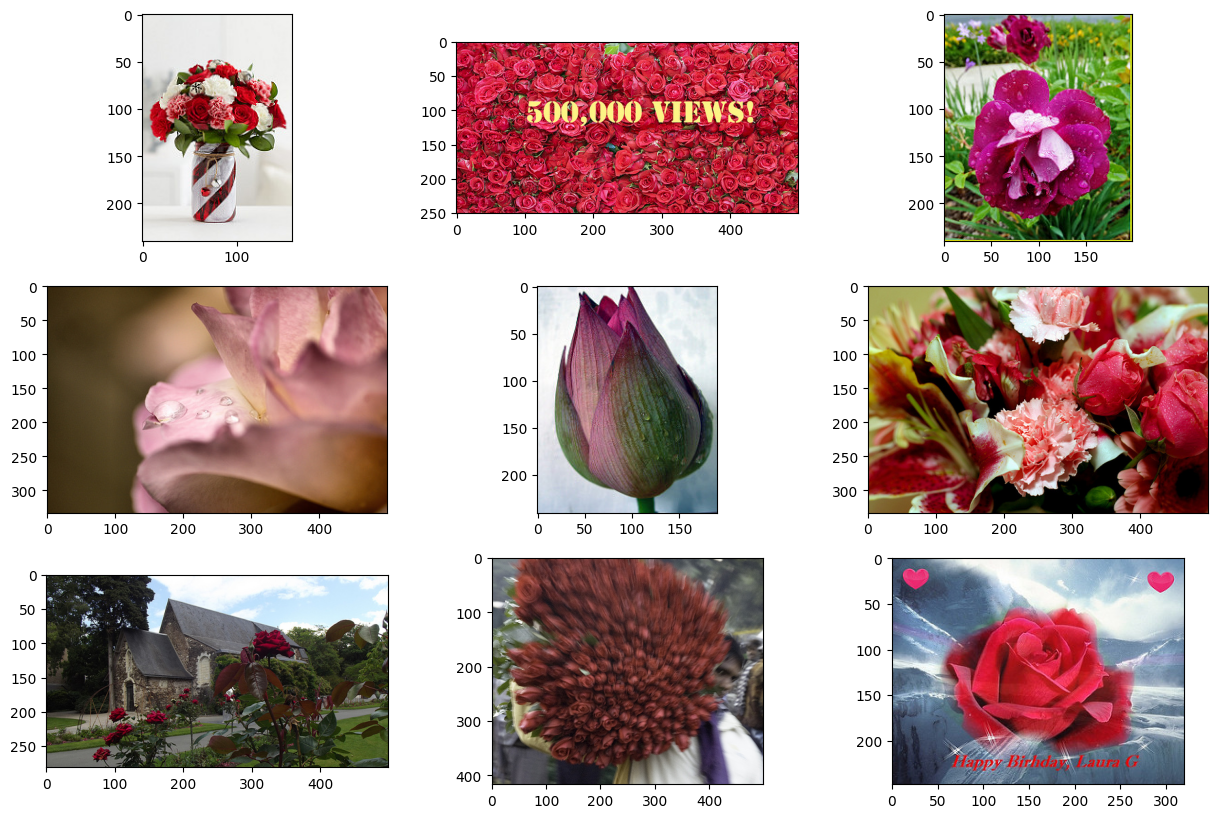

In [27]:
#Display Images
plt.figure(figsize = (15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(PIL.Image.open(rose[i]))



In [30]:
 #tulip
 tulips = list(data_dir.glob("tulips/*.jpg"))

In [32]:
image_count_tulips = len(tulips)
image_count_tulips

799

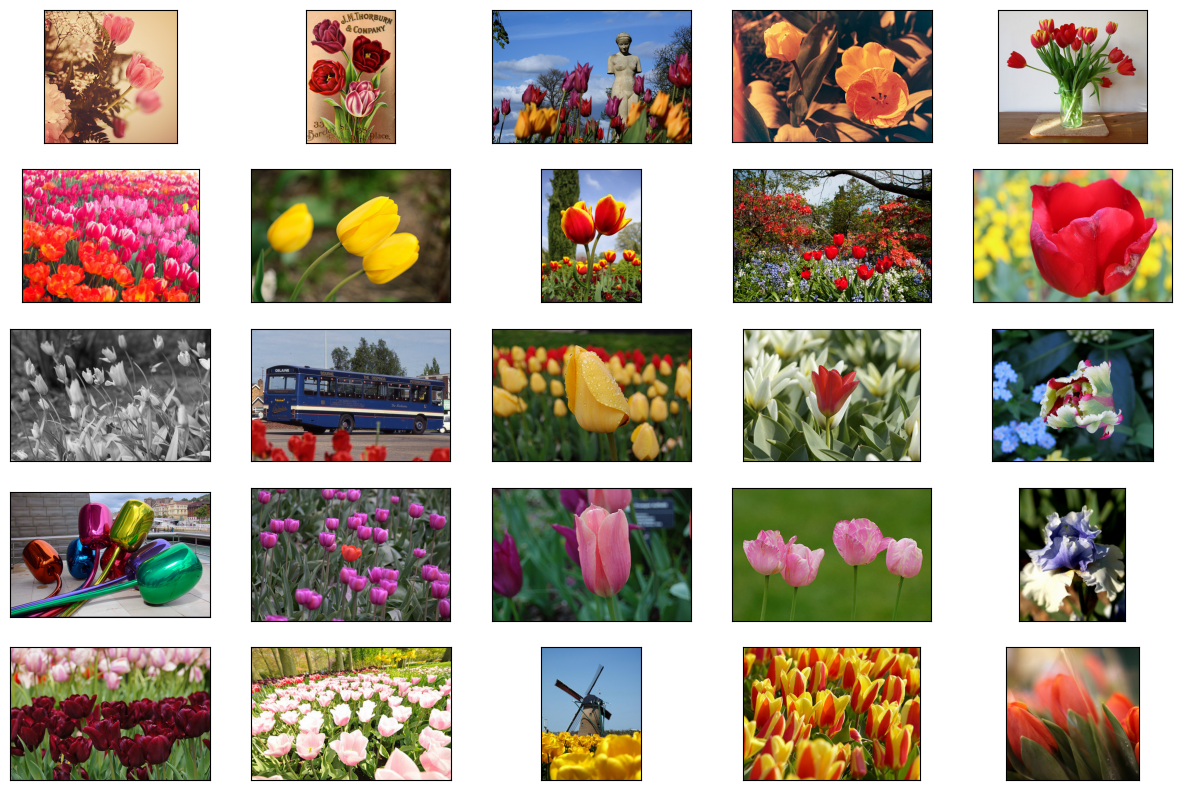

In [35]:
#Display Tulips Images
plt.figure(figsize = (15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(PIL.Image.open(tulips[i]))
  plt.xticks([])
  plt.yticks([])

In [37]:
#create Training Dataset

img_height = 180
img_width = 180
batch_size = 32
train_ds = tensorflow.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                               validation_split = 0.20,
                                                               subset = 'training',
                                                               image_size = (img_height,img_width),
                                                               seed = 123)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [38]:
#create validation Dataset

img_height = 180
img_width = 180
batch_size = 32
val_ds = tensorflow.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                               validation_split = 0.20,
                                                               subset = 'validation',
                                                               image_size = (img_height,img_width),
                                                               seed = 123)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [39]:
#training Dataset

train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

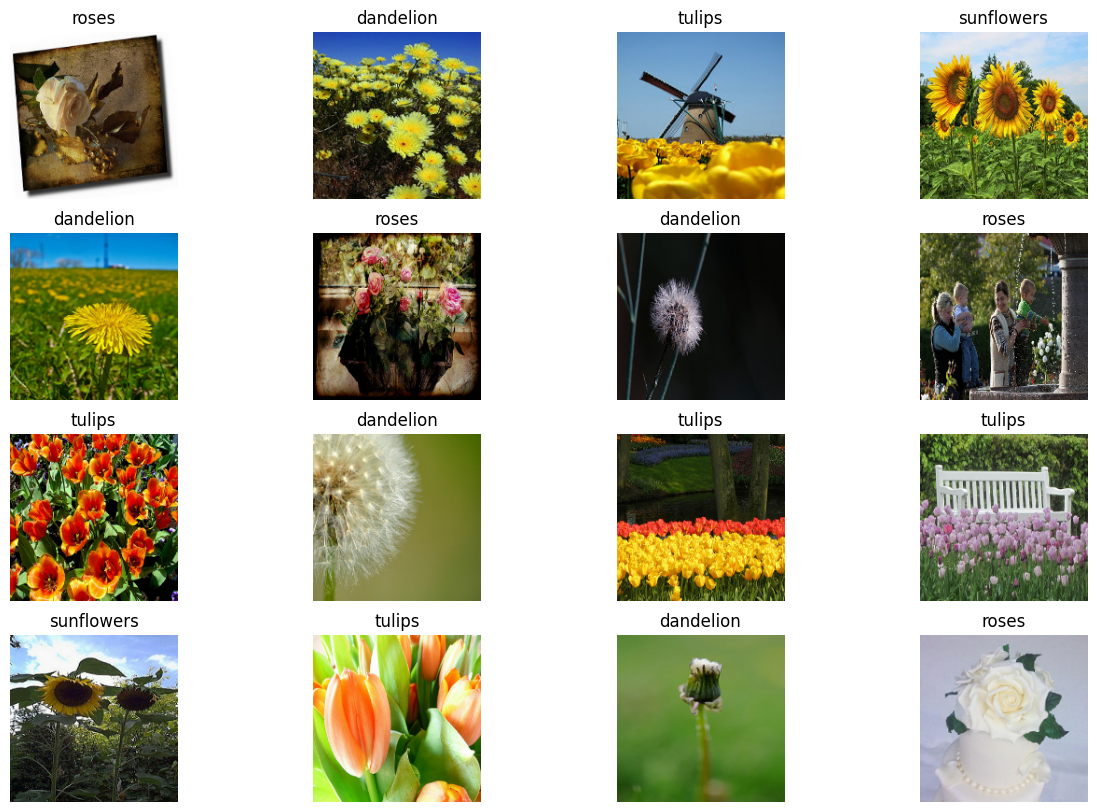

In [43]:
#Display training dataset Images

plt.figure(figsize = (15,10))
for images, labels in train_ds.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis('off')






In [40]:
train_ds.take(5)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>